<a href="https://colab.research.google.com/github/mohamedyosef101/101_learning_area/blob/area/PyTorch/vanilla_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vanilla** Neural Network
The original notebook created by [Andrada](https://www.kaggle.com/code/andradaolteanu/how-i-taught-myself-deep-learning-vanilla-nns#1.-Introduction)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

# **Load** the data

In [2]:
train = datasets.MNIST('data',
                       train=True,
                       download=True,
                       transform=ToTensor())

test = datasets.MNIST('data',
                      train=False,
                      download=True,
                      transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 126074874.14it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 35764893.36it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 47986035.52it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11393856.92it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# Data **Exploration**

In [19]:
# some info about the data
train, test

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [24]:
# index 1 image
image, label = train[1]
image.shape, label

(torch.Size([1, 28, 28]), 0)

Text(0.5, 1.0, '0 - zero')

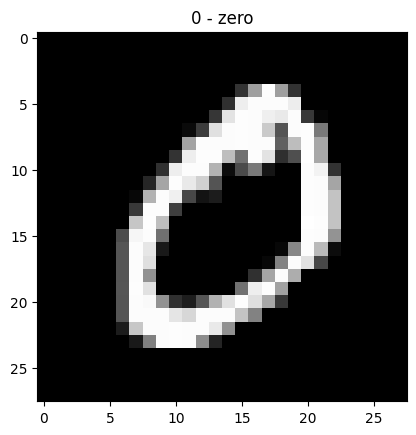

In [25]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(train.classes[label])

# **Initial** Model

In [ ]:
class MNISTClassifier(nn.Module):
  def __init__(self):
    super(MNISTClassifier, self).__init__()
    self.layers = nn.Sequential(nn.Linear(28*28, 50),
                                nn.RelU(),
                                nn.Linear(50, 50),
                                nn.RelU(),
                                nn.Linear(20, 10))

    def forward(self, image, prints=False):
      if prints: print(f'Image shape: {image.shape}')
      # flatten image from [1, 28, 28] to [784]
      image = image.view(-1, 28*28)

      if prints: print(f"Image reshaped: {image.shape}")
      out = self.layers(image)